# Step 2: Fill holes in processing area

In [1]:
import gdal
import numpy as np
import rasterio
from tqdm.notebook import tnrange


ds = gdal.Open('process_area_june_28.tif')
band1 = ds.GetRasterBand(1).ReadAsArray()
band2 = np.copy(band1)

In [155]:
from tqdm.notebook import tnrange

for iteration in range(0, 2):
    for x_window in tnrange(1, band1.shape[0] - 2, 1):
        for y_window in range(1, band1.shape[1] - 2, 1):
            window = band2[x_window - 1: x_window + 2, y_window - 1: y_window + 2]
            if window[1, 1] == 0:
                u = window[0, 1]
                d = window[2, 1]
                l = window[1, 0]
                r = window[1, 2]
                if (u + d) == 2 or (l + r) == 2:
                    band2[x_window, y_window] = 1.


In [156]:
for iteration in range(0, 1):
    for x_window in tnrange(2, band1.shape[0] - 3, 1):
        for y_window in range(2, band1.shape[1] - 3, 1):
            window = band1[x_window - 2: x_window + 2, y_window - 2: y_window + 2]
            # -2, -1, 0, 1
            if np.sum(window[1:3, 1:3]) == 0:
                u = np.sum(window[0, 1:3])
                d = np.sum(window[3, 1:3])
                l = np.sum(window[1:3, 0])
                r = np.sum(window[1:3, 3])
                if (u + d) >= 3 or (l + r) >= 3:
                    band2[x_window - 1: x_window +1, y_window -1: y_window + 1] = 1.



In [2]:
for iteration in range(0, 2):
    for x_window in tnrange(1, band1.shape[0] - 2, 1):
        for y_window in range(1, band1.shape[1] - 2, 1):
            window = band2[x_window - 1: x_window + 2, y_window - 1: y_window + 2]
            if window[1, 1] == 0:
                u = window[0, 1]
                d = window[2, 1]
                l = window[1, 0]
                r = window[1, 2]
                if (u + d) == 2 or (l + r) == 2:
                    band2[x_window, y_window] = 1.

In [158]:
band1 = np.copy(band2)
for iteration in range(0, 1):
    for x_window in tnrange(2, band1.shape[0] - 3, 1):
        for y_window in range(2, band1.shape[1] - 3, 1):
            window = band1[x_window - 2: x_window + 2, y_window - 2: y_window + 2]
            if np.sum(window[1:3, 1:3]) == 0:
                u = np.sum(window[0, 1:3])
                d = np.sum(window[3, 1:3])
                l = np.sum(window[1:3, 0])
                r = np.sum(window[1:3, 3])
                if (u + d) >= 3 or (l + r) >= 3:
                    band2[x_window - 1: x_window +1, y_window -1: y_window + 1] = 1.

In [159]:
for iteration in range(0, 2):
    for x_window in tnrange(1, band1.shape[0] - 2, 1):
        for y_window in range(1, band1.shape[1] - 2, 1):
            window = band2[x_window - 1: x_window + 2, y_window - 1: y_window + 2]
            if window[1, 1] == 0:
                u = window[0, 1]
                d = window[2, 1]
                l = window[1, 0]
                r = window[1, 2]
                if (u + d) == 2 or (l + r) == 2:
                    band2[x_window, y_window] = 1.

In [3]:
transform = rasterio.transform.from_bounds(west = -117.0, south = -55.5,
                                           east = 51.00, north = 37.5000000000,
                                           width = band1.shape[1], 
                                           height = band1.shape[0])

new_dataset = rasterio.open("process_area_june_28_filled_revisit.tif", 'w', driver = 'GTiff',
                           height = band2.shape[0], width = band2.shape[1], count = 1,
                           dtype = 'uint16',#str(stacked.dtype),
                           crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs',
                           transform=transform)
new_dataset.write(band2, 1)
new_dataset.close()

In [4]:
np.sum(band2)

407886

# Step 1: Convert to 6 x 6 km binary raster

In [8]:
import gdal
import numpy as np
ds = gdal.Open('sa_africa_binary_new.tif')

options_str = '-ot Byte'

ds = gdal.Translate('new_coords.tif', ds, projWin = [-117.0, 37.5, 51.00, -55.5],
                   options=options_str)
ds = None
#band1 = ds.GetRasterBand(1).ReadAsArray()

In [6]:
ds = gdal.Open('lulc_sa_africa_binary.tif')
band1 = ds.GetRasterBand(1).ReadAsArray()

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [12]:
print(band1.shape)

(33480, 60480)


In [4]:
band1 = band1[:33480, :60480]

band1 = np.reshape(band1, ((33480 // 20, 20, 60480 // 20, 20)))

In [14]:
band1 = np.sum(band1, axis = (1, 3))

In [15]:
band1 = band1.astype(np.uint16)

In [16]:
print(f"The total TOF area is: {np.sum(band1) * ((300*300) / (1000*1000))}")



The total TOF area is: 9159970.86


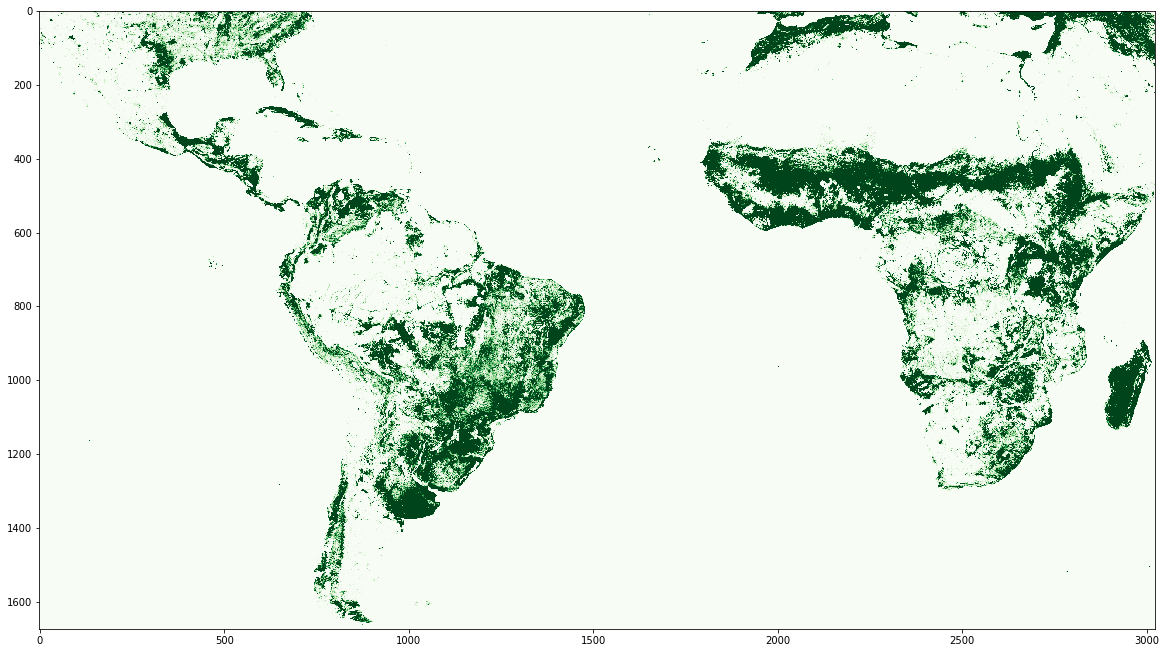

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,17))
plt.imshow(band1, cmap='Greens', vmin=0, vmax=100)
plt.show()

In [18]:
import rasterio
transform = rasterio.transform.from_bounds(west = -117.0, south = -55.5,
                                           east = 51.00, north = 37.5000000000,
                                           width = band1.shape[1], 
                                           height = band1.shape[0])

new_dataset = rasterio.open("output_summed.tif", 'w', driver = 'GTiff',
                           height = band1.shape[0], width = band1.shape[1], count = 1,
                           dtype = 'uint16',#str(stacked.dtype),
                           crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs',
                           transform=transform)
new_dataset.write(band1, 1)
new_dataset.close()

In [19]:
np.max(band1)

400

In [22]:
for thresh in [0.3, 0.35, 0.4, 0.45, 0.5]:
    test = np.copy(band1)
    test[test < thresh * 400] = 0
    test[test >= thresh * 400] = 1
    print(np.sum(test))# / np.sum(band1))# / 9161269)
    #print(test[:100, :100])
    #print(test)

319987
285105
254433
227568
203190


In [20]:
!gdalwarp -of GTiff -srcnodata 0 -dstnodata 0 -ot Uint16 -cutline clipping/cutline.shp -crop_to_cutline output_summed.tif Cutted_new.tif

Creating output file that is 3029P x 1673L.
Processing output_summed.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [28]:
import gdal
import numpy as np
ds = gdal.Open('output_summed.tif')
band1 = ds.GetRasterBand(1).ReadAsArray()

In [22]:
print(f"The total TOF area is: {np.sum(band1) * ((300*300) / (1000*1000))}")



The total TOF area is: 8316601.02


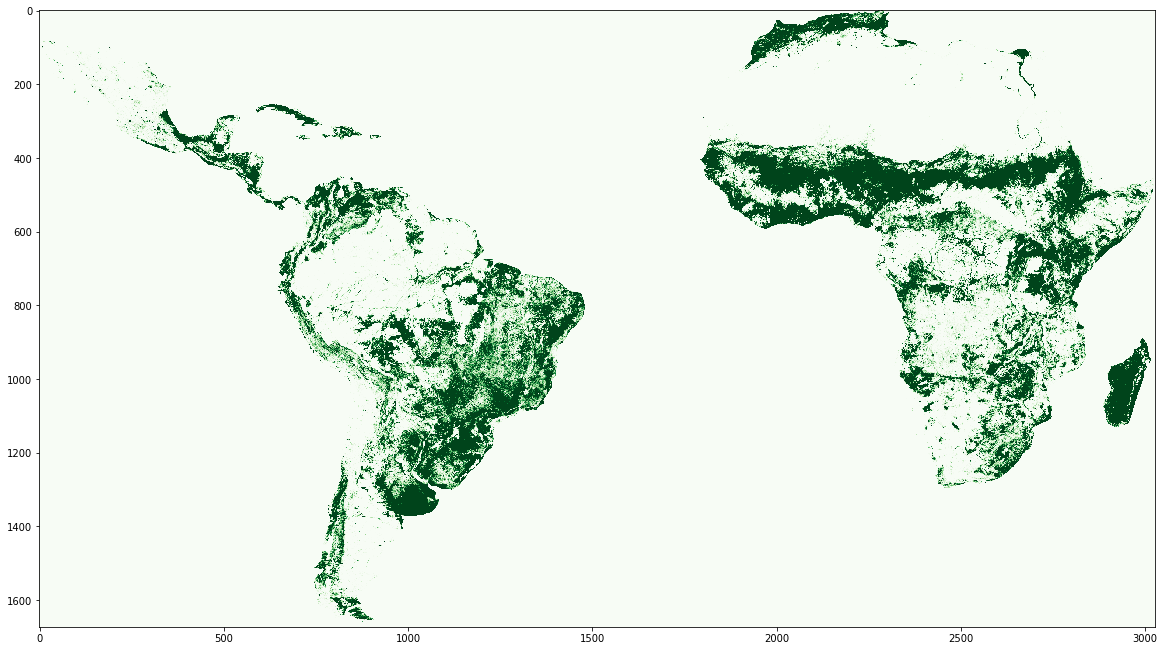

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,17))
plt.imshow(band1, cmap='Greens', vmin=0, vmax=100)
plt.show()

In [24]:
for thresh in [0.2, 0.25, 0.3, 0.35]:
    test = np.copy(band1)
    test[test < thresh * 400] = 0
    test[test >= thresh * 400] = 1
    print(np.sum(test) * 36)# / np.sum(band1))# / 9161269)
    #print(test[:100, :100])
    #print(test)

13289940.0
11752596.0
10464084.0
9344844.0


In [29]:
test = np.copy(band1)
test[test < 0.35 * 400] = 0.
test[test >= 0.35 * 400] = 1.

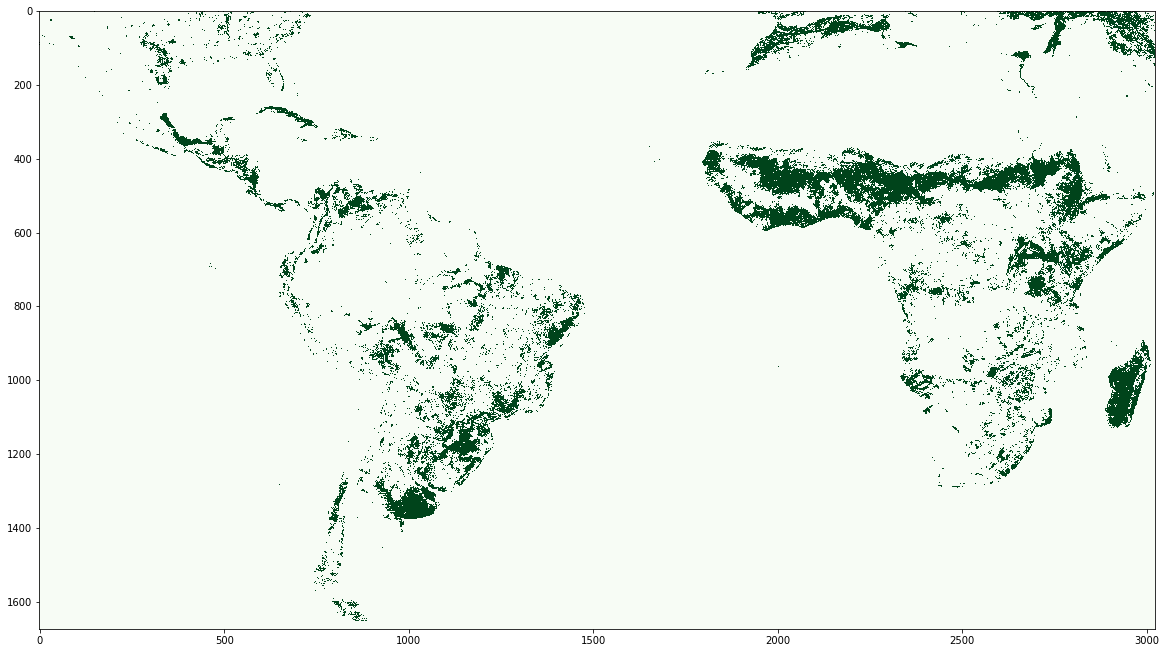

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,17))
plt.imshow(test, cmap='Greens', vmin=0, vmax=1)
plt.show()

In [210]:
for thresh in [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    test = np.copy(band1)
    test[test < thresh * 400] = 0
    #test[test >= thresh * 400] = 1
    print((np.sum(test)) / np.sum(band1))

0.9545534318565944
0.8810009973373123
0.8397677067693035
0.7974399963130949
0.7539225934620039
0.7097341318274945
0.6657857157226212
0.6213017684138019


In [31]:
import rasterio
transform = rasterio.transform.from_bounds(west = -117.0, south = -55.5,
                                           east = 51.00, north = 37.5000000000,
                                           width = band1.shape[1], 
                                           height = band1.shape[0])

new_dataset = rasterio.open("processing_area_mar_17.tif", 'w', driver = 'GTiff',
                           height = test.shape[0], width = test.shape[1], count = 1,
                           dtype = 'uint16',#str(stacked.dtype),
                           crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs',
                           transform=transform)
new_dataset.write(test, 1)
new_dataset.close()

# Step 3: Add in all urban areas

The threshold for urban areas is 20/400 = 5%
The overall thres4hold is 35%

In [135]:
import gdal
import numpy as np
ds = gdal.Open('sa_africa_lulc.tif')
band1 = ds.GetRasterBand(1).ReadAsArray()

In [136]:
band1[band1 == 10] = 255.
band1[band1 == 20] = 255.
band1[band1 < 255 ] = 0.
band1[band1 == 255] = 1.
print(np.sum(band1))

38818703


In [137]:
print(band1.shape)

(33480, 60516)


In [138]:
band1 = band1[:33480, :60480]

band1 = np.reshape(band1, ((33480 // 20, 20, 60480 // 20, 20)))

In [139]:
band1 = np.sum(band1, axis = (1, 3))

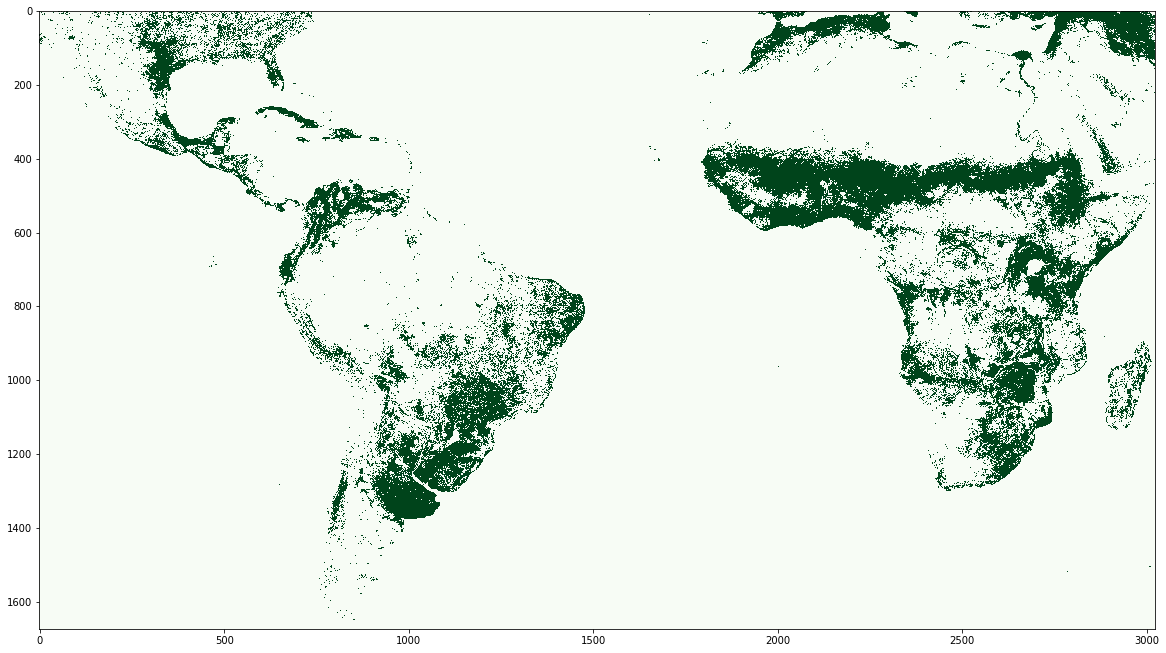

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,17))
plt.imshow(band1, cmap='Greens', vmin=0, vmax=1)
plt.show()

In [141]:
band1[band1 < 40] = 0.
band1[band1 >= 40] = 1.

In [142]:
band1 = band1.astype(np.uint16)

In [143]:
import rasterio
transform = rasterio.transform.from_bounds(west = -117.0, south = -55.5,
                                           east = 51.00, north = 37.5000000000,
                                           width = band1.shape[1], 
                                           height = band1.shape[0])

new_dataset = rasterio.open("crop_6km.tif", 'w', driver = 'GTiff',
                           height = band1.shape[0], width = band1.shape[1], count = 1,
                           dtype = 'uint16',#str(stacked.dtype),
                           crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs',
                           transform=transform)
new_dataset.write(band1, 1)
new_dataset.close()

In [144]:
np.sum(band1)

217369

In [145]:
band1.shape

(1674, 3024)

# Step 4: Combine the tifs

In [146]:
ds = gdal.Open('tof_processing_area_june_23.tif')
process_area = ds.GetRasterBand(1).ReadAsArray()
ds = None

ds = gdal.Open('urban_6km.tif')
urban = ds.GetRasterBand(1).ReadAsArray()
ds = None

ds = gdal.Open('crop_6km.tif')
crop = ds.GetRasterBand(1).ReadAsArray()
ds = None

In [150]:
process_area = process_area + urban + crop
process_area[process_area > 1] = 1.

In [153]:
import rasterio
transform = rasterio.transform.from_bounds(west = -117.0, south = -55.5,
                                           east = 51.00, north = 37.5000000000,
                                           width = band1.shape[1], 
                                           height = band1.shape[0])

new_dataset = rasterio.open("process_area_june_28.tif", 'w', driver = 'GTiff',
                           height = band1.shape[0], width = band1.shape[1], count = 1,
                           dtype = 'uint16',#str(stacked.dtype),
                           crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs',
                           transform=transform)
new_dataset.write(process_area, 1)
new_dataset.close()

# Step 5: Compare the coverage

In [12]:
import gdal
import numpy as np
import rasterio
from tqdm.notebook import tnrange

In [13]:
ds = gdal.Open('sa_africa_lulc.tif')
lulc = ds.GetRasterBand(1).ReadAsArray()
lulc = lulc[:, :60480]
ds = None

ds = gdal.Open('process_area_june_28_filled.tif')
area = ds.GetRasterBand(1).ReadAsArray()
area = area.repeat(20,axis=0).repeat(20,axis=1)
ds = None

In [14]:
unique_all, counts_all = np.unique(lulc, return_counts=True)
for x, y in zip(unique_all, counts_all):
    print(f"{x}: {y}")

10: 35763622
11: 34234671
12: 404588
20: 3040271
30: 20003819
40: 17223725
50: 101802166
60: 24422542
61: 5536478
62: 36907449
70: 8047771
80: 148379
90: 3422183
100: 12652758
110: 6684981
120: 94365804
121: 5
122: 1156863
130: 45484942
140: 31
150: 16465751
151: 63
152: 490759
153: 4201505
160: 5348896
170: 962912
180: 7276287
190: 2206710
200: 144509271
201: 552705
202: 102799
210: 1390812345
220: 637349


In [19]:
for x, y, z in zip(unique_process[1:], counts_process[1:], counts_all):
    if x in unique_all:
    print(f"{x}: {y}, {y/z}")

10: 34357195, 0.9606743690557964
11: 16895318, 0.49351483471244695
12: 227179, 0.5615070145431896
20: 2956561, 0.9724662702765642
30: 16221515, 0.8109209046532565
40: 13343893, 0.774739088089249
50: 12159322, 0.11944070030887162
60: 3578304, 0.1465164437018882
61: 516667, 0.09332051892918206
62: 7314171, 0.19817601048503786
70: 969752, 0.12049945258134209
80: 45774, 0.30849378955242995
90: 400502, 0.1170311464933348
100: 9069933, 0.7168344640749471
110: 5289943, 0.79131758190487
120: 17715950, 0.18773696878585383
122: 476382, 95276.4
130: 14318855, 12.377312611778578
140: 16, 3.517647664583149e-07
150: 1872201, 60393.58064516129
151: 20, 1.214642441756832e-06
152: 95546, 1516.6031746031747
153: 3547557, 7.228715112713164
160: 441435, 0.10506592280623253
170: 269115, 0.05031225135055907
180: 1605079, 1.6669010252234888
190: 2045317, 0.2810935027713998
200: 4046653, 1.8337946535793104
201: 134383, 0.0009299264958578333
202: 3876, 0.007012782587456238
210: 2639264, 25.674024066381968
220:

0.8109209046532565

In [15]:
lulc[area == 0] = 0.

unique_process, counts_process = np.unique(lulc, return_counts=True)

[  0  10  11  12  20  30  40  50  60  61  62  70  80  90 100 110 120 122
 130 140 150 151 152 153 160 170 180 190 200 201 202 210 220]: [1852304800   34357195   16895318     227179    2956561   16221515
   13343893   12159322    3578304     516667    7314171     969752
      45774     400502    9069933    5289943   17715950     476382
   14318855         16    1872201         20      95546    3547557
     441435     269115    1605079    2045317    4046653     134383
       3876    2639264       7922]
[  0  10  11  12  20  30  40  50  60  61  62  70  80  90 100 110 120 122
 130 140 150 151 152 153 160 170 180 190 200 201 202 210 220]: [1852304800   34357195   16895318     227179    2956561   16221515
   13343893   12159322    3578304     516667    7314171     969752
      45774     400502    9069933    5289943   17715950     476382
   14318855         16    1872201         20      95546    3547557
     441435     269115    1605079    2045317    4046653     134383
       3876    2639264 

In [25]:
import pandas as pd
process = pd.DataFrame({"id": unique_process, "count": counts_process})
total =  pd.DataFrame({"id": unique_all, "count_all": counts_all})

In [28]:
overall = pd.merge(process, total)

In [30]:
overall['percent'] = overall['count'] / overall['count_all']

In [ ]:
names = ['Crop rainfed', 'Herbaceous', 'Tree or shrub', 'Crop irrigated',
        'Mosaic cropland' ,'Mosaic natural', '']

In [32]:
overall.to_csv("coverage.csv")

## All areas

In [3]:
import rasterio as rs
import numpy as np
ds = rs.open('sa_africa_lulc.tif').read(1)

In [4]:
ds[ds == 0] = 255.
ds[ds == 200] = 255.
ds[ds == 210] = 255.
ds[ds < 255 ] = 1.
ds[ds == 255] = 0.
print(np.sum(ds))

489616632


In [5]:
ds = ds[:33480, :60480]

ds = np.reshape(ds, ((33480 // 20, 20, 60480 // 20, 20)))

In [6]:
ds = np.sum(ds, axis = (1, 3))

In [8]:
ds[ds < 40] = 0.
ds[ds >= 40] = 1.

In [10]:
import rasterio
transform = rasterio.transform.from_bounds(west = -117.0, south = -55.5,
                                           east = 51.00, north = 37.5000000000,
                                           width = ds.shape[1], 
                                           height = ds.shape[0])

new_dataset = rasterio.open("process_area_nov_2.tif", 'w', driver = 'GTiff',
                           height = ds.shape[0], width = ds.shape[1], count = 1,
                           dtype = 'uint16',#str(stacked.dtype),
                           crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs',
                           transform=transform)
new_dataset.write(ds, 1)
new_dataset.close()